<pre>
    Name:                 RAJNITA LEICHOMBAM
    USC-ID:               1370432160
    Github-username:      Rajnita
</pre>

# Homework - 1

*1. Vertebral Column Data Set
This Biomedical data set was built by Dr. Henrique da Mota during a medical residence
period in Lyon, France. Each patient in the data set is represented in the data set
by six biomechanical attributes derived from the shape and orientation of the pelvis
and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle,
sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is
used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and
Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0
and AB=1.1*

#### *(a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.*

   The data is downloaded and put under /data folder. As per the question, I am using column_2c.dat  data for the assignment

In [1]:
##All the imports needed to run this file are in this cell

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score
import math

#### *(b) Pre-Processing and Exploratory data analysis:*

#### *i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.*

In [2]:
############## READING DATA FROM FILE ##################
data = pd.read_csv("../data/vertebral_column_data/column_2C.dat", 
                 sep="\s+", #separator whitespace,
                 header=None) 
data.columns=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
            'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']
dictd={"NO":0,"AB":1}
df=data.replace({"class":dictd})
df.head()

####UNCOMMENT THESE LINES TO READ FROM ARFF FILE, FOR THIS HOMEWORK READING FROM .DAT file

# from scipy.io import arff

# file_data = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
# data= pd.DataFrame(file_data[0])
# # String decoding to avoid byte string
# data['class'] = data['class'].str.decode('utf-8') 
# dictd={"Normal":0,"Abnormal":1}
# df=data.replace({"class":dictd})
# df.head() 

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


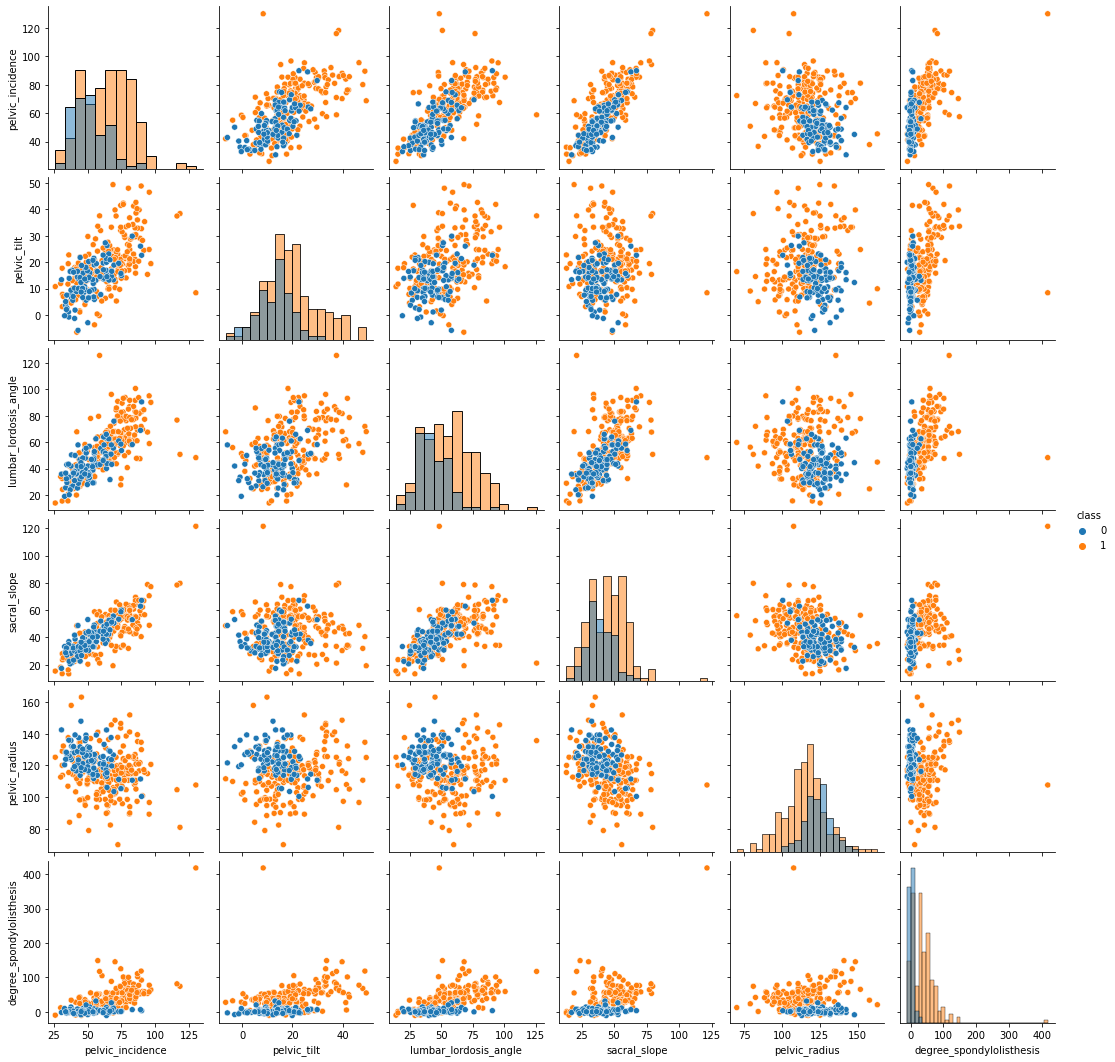

In [3]:
###############USING SEABORN FOR PLOTTING ################
sns.pairplot(df, hue="class", diag_kind="hist")

#### *ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129)*

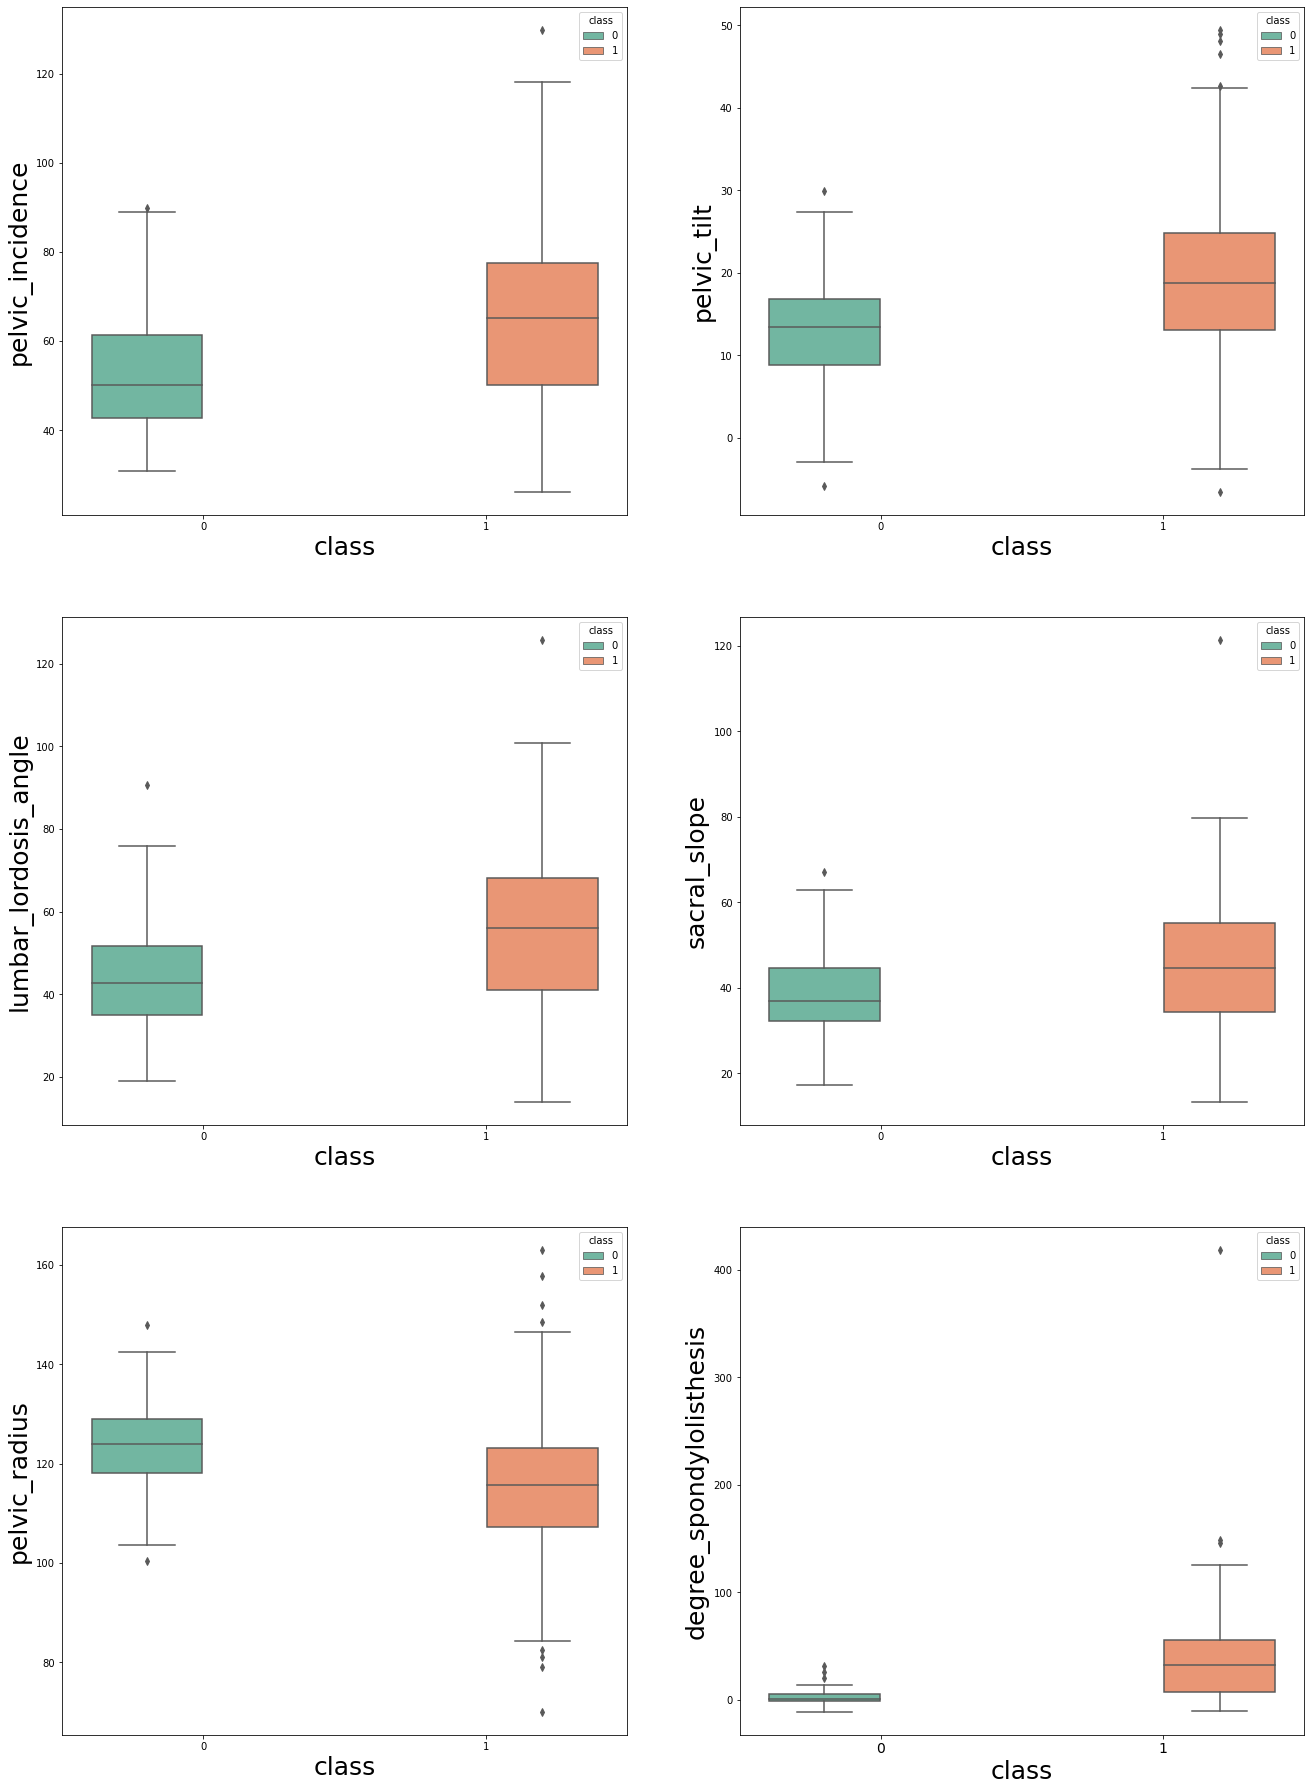

In [4]:
f, axes = plt.subplots(3, 2)
f.subplots_adjust(bottom=1, right=3, top=7)

ax1=sns.boxplot(x="class", y="pelvic_incidence", hue="class",
                 data=df, palette="Set2",ax=axes[0][0])
ax1.xaxis.label.set_size(25)
ax1.yaxis.label.set_size(25)

ax2=sns.boxplot(x="class", y="pelvic_tilt", hue="class",
                 data=df, palette="Set2",ax=axes[0][1])
ax2.xaxis.label.set_size(25)
ax2.yaxis.label.set_size(25)

ax3=sns.boxplot(x="class", y="lumbar_lordosis_angle", hue="class",
                 data=df, palette="Set2",ax=axes[1][0])
ax3.xaxis.label.set_size(25)
ax3.yaxis.label.set_size(25)

ax4=sns.boxplot(x="class", y="sacral_slope", hue="class",
                 data=df, palette="Set2",ax=axes[1][1])
ax4.xaxis.label.set_size(25)
ax4.yaxis.label.set_size(25)

ax5=sns.boxplot(x="class", y="pelvic_radius", hue="class",
                 data=df, palette="Set2",ax=axes[2][0])
ax5.xaxis.label.set_size(25)
ax5.yaxis.label.set_size(25)

ax6=sns.boxplot(x="class", y="degree_spondylolisthesis", hue="class",
                 data=df, palette="Set2",ax=axes[2][1])
ax6.xaxis.label.set_size(25)
ax6.yaxis.label.set_size(25)

plt.xticks(fontsize=14)

plt.show()

#### *iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.*

In [5]:
#creating a copy to do any modifications for a safe side , just in case i need the original data later
df_copy = df.copy()
#Getting rows with Class 0
normal_class_0_data = df_copy.loc[df_copy['class'] == 0]

#selecting 70 rows of class 0 or Normal
class_0_train_data=pd.DataFrame(normal_class_0_data[:70])

#remaining data with class 0 for test set
class_0_test_data=pd.DataFrame(normal_class_0_data[70:])

#Getting rows with Class 1 or Abnormal Label
abnormal_class_1_data = df_copy.loc[df_copy['class'] == 1]
#selecting 140 rows of class 1 or AbNormal
class_1_train_data = pd.DataFrame(abnormal_class_1_data[:140])
#remaining data for test set
class_1_test_data  = pd.DataFrame(abnormal_class_1_data[140:])

training_set =class_0_train_data.append(class_1_train_data)
print('**************** TRAINING SET DATA ******************')
print(training_set)
print('\n\n')
print('**************** TEST SET DATA ******************')
test_set=class_0_test_data.append(class_1_test_data )
print('\n\nTEST SET DATA')
print(test_set)

**************** TRAINING SET DATA ******************
     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
210             38.51        16.96                  35.11         21.54   
211             54.92        18.97                  51.60         35.95   
212             44.36         8.95                  46.90         35.42   
213             48.32        17.45                  48.00         30.87   
214             45.70        10.66                  42.58         35.04   
..                ...          ...                    ...           ...   
135             77.12        30.35                  77.48         46.77   
136             88.02        39.84                  81.77         48.18   
137             83.40        34.31                  78.42         49.09   
138             72.05        24.70                  79.87         47.35   
139             85.10        21.07                  91.73         64.03   

     pelvic_radius  degree_spondylolisthesis 

#### *(c) Classification using KNN on Vertebral Column Data Set*

i. Write code for k-nearest neighbors with Euclidean metric (or use a software
package).


In [6]:
# Calculating K  NEAREST NEIGHBOUR USING SCIKIT LEARN   
# Taking k as 56 for an example, displaying classification report, score, confusion matrix
#default is minkowski with p as 2, i.e. equivalent to euclidean

knn = KNeighborsClassifier(n_neighbors=56)
tr_x,tr_y=training_set[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']],training_set['class']
te_x,te_y=test_set[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']],test_set['class']

knn.fit(tr_x, tr_y)

print('when k=56, Score or Mean accuracy on the test data:', knn.score(te_x,te_y))


when k=56, Score or Mean accuracy on the test data: 0.88


ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for
k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller
increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision,and F1-score when k = k∗


<span style="color:green"> Consider the answer of the above ii question in 2 parts
    <br>
    - Part 1: Plotting train and test errors<br>
    - Part 2: Choosing the most suitable k, and calculation of confusion matrix, true positive rate, true negative rate, precisio, F1-score for most suitable k
    </span>

<span style="color:green">PART 1: Plotting train and test errors</span>

K values:  [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97, 100, 103, 106, 109, 112, 115, 118, 121, 124, 127, 130, 133, 136, 139, 142, 145, 148, 151, 154, 157, 160, 163, 166, 169, 172, 175, 178, 181, 184, 187, 190, 193, 196, 199, 202, 205, 208]

Score [0.87, 0.94, 0.88, 0.9, 0.88, 0.91, 0.89, 0.9, 0.89, 0.9, 0.89, 0.89, 0.89, 0.9, 0.88, 0.88, 0.89, 0.89, 0.88, 0.88, 0.88, 0.88, 0.87, 0.88, 0.87, 0.88, 0.87, 0.86, 0.84, 0.83, 0.84, 0.85, 0.84, 0.86, 0.82, 0.86, 0.84, 0.84, 0.8, 0.85, 0.78, 0.8, 0.77, 0.76, 0.73, 0.72, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


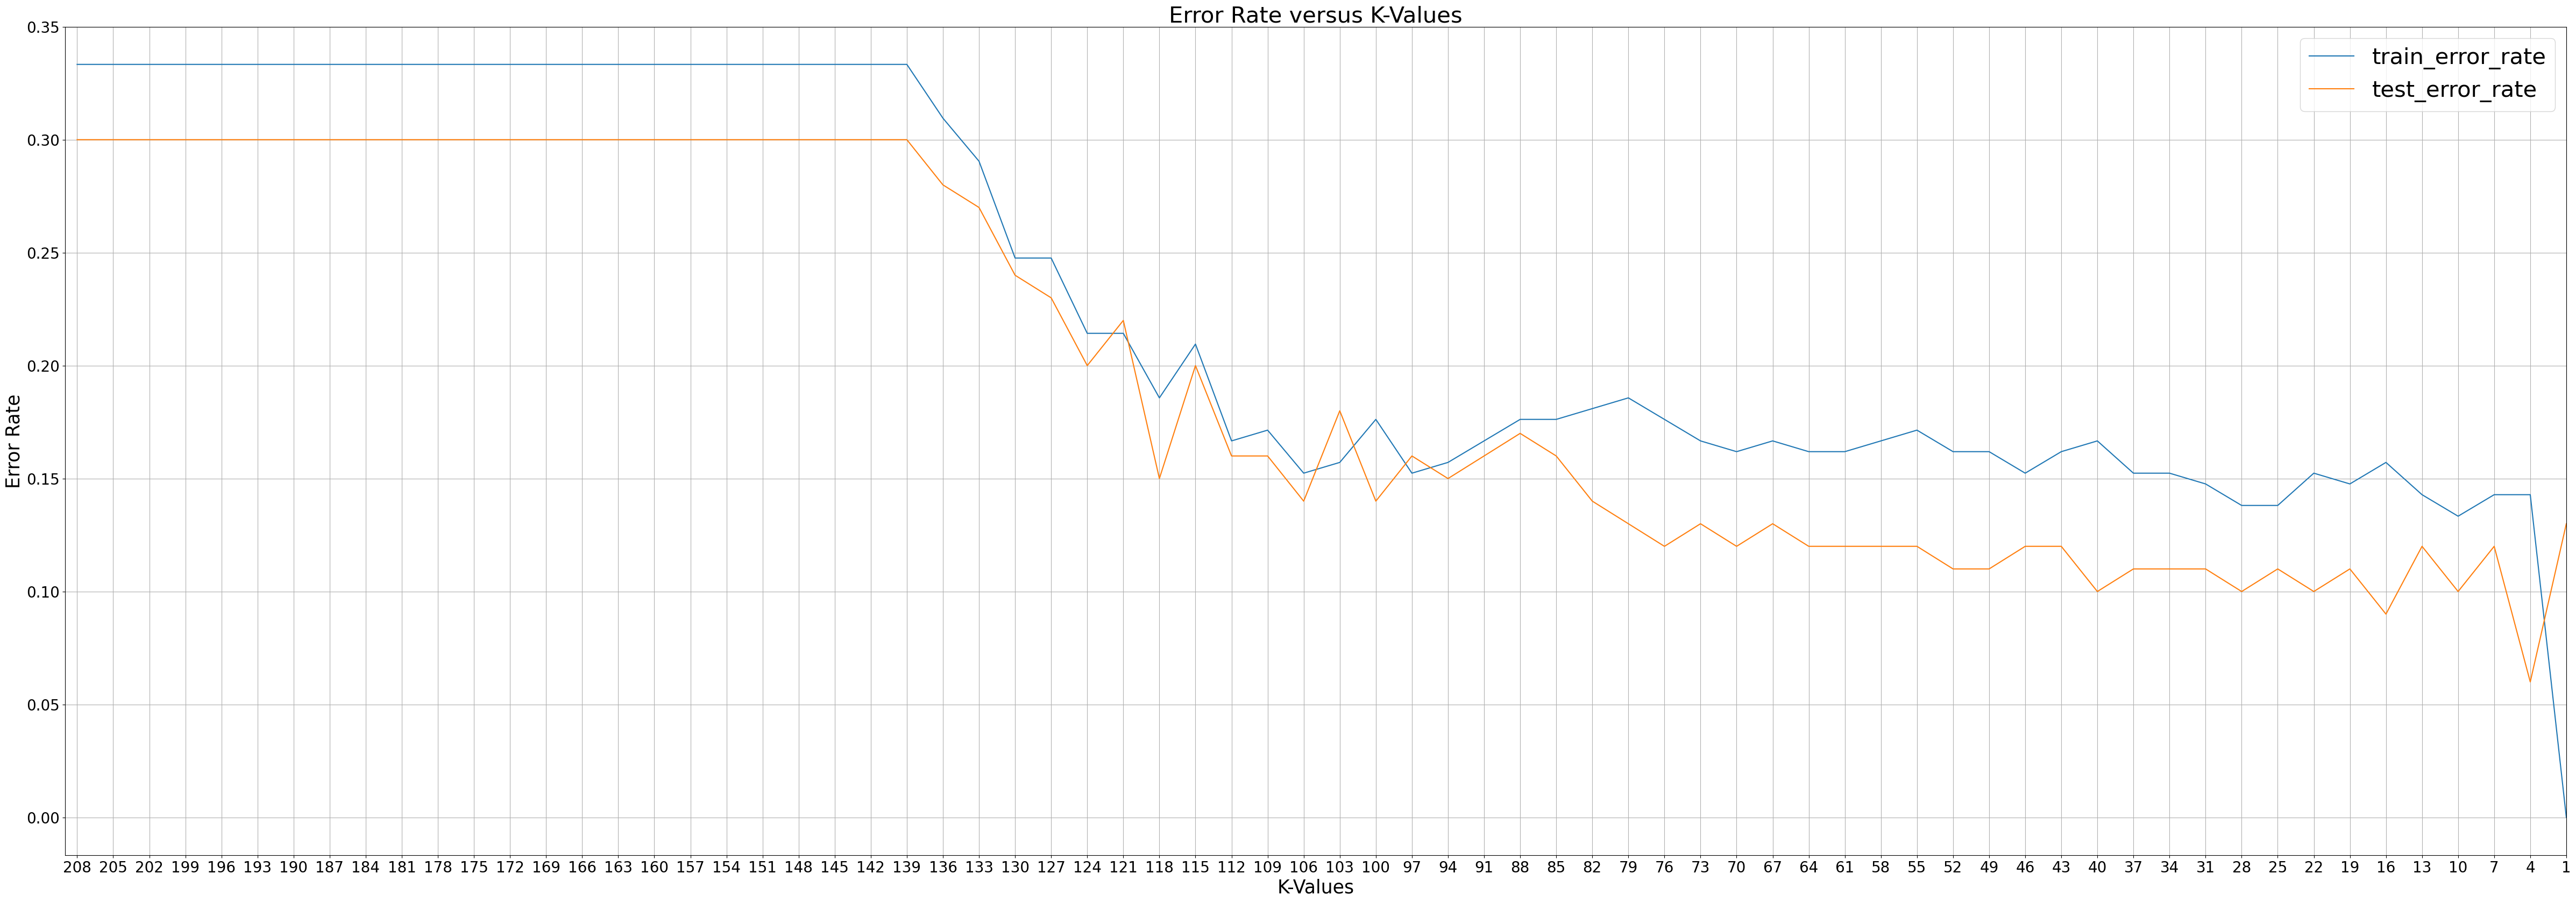

In [7]:
##Splitting the independent and dependent variables accordingly
train_x,train_y=training_set[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']],training_set['class']
test_x,test_y=test_set[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']],test_set['class']

test_error_rate = []
train_error_rate = []
k_values=[]
score=[]

for i in range(1,209,3):
    k_values.append(i)
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(train_x, train_y)
    
    prediction_of_test_data = knn.predict(test_x)
    prediction_of_train_data = knn.predict(train_x)
    
    train_error_rate.append(np.mean(prediction_of_train_data!= train_y))
    test_error_rate.append(np.mean(prediction_of_test_data!= test_y))
    
    score.append(knn.score(test_x,test_y))
    


print('K values: ', k_values)
print('\nScore',score)

########Plotting test and train errors##########
plt.style.use('default')
plt.figure(figsize=(60,20))

##Using x lim to invert x axis, Can use invert_axis too
plt.xlim(209,1)

plt.plot(range(1,209,3),train_error_rate, label = "train_error_rate")
plt.plot(range(1,209,3),test_error_rate, label = "test_error_rate")

plt.xticks(np.arange(1, 209, 3), fontsize=20)
plt.yticks(fontsize=20)

plt.title('Error Rate versus K-Values', fontsize=30)
plt.xlabel('K-Values',fontsize=25)
plt.ylabel('Error Rate',fontsize=25)
plt.gca().grid()
plt.legend(prop={'size': 30})
plt.show()   

<span style="color:blue">From the above train and test error graphs, we can see that the test error is lowest at k=4. 
<b>So the most suitable k would be 4. </b>
<br>We can see that the training error is lowest when k=1, we wouldn't choose this value since it could cause overfitting, and also we should emphaisize on the test errors for deciding a k value
  <br>The confusion matrix, true positive rate, true negative rate, precision, F1-score for k=4 below
   </span>

In [8]:
#Setting k=4
optimalKclassifier = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
optimalKclassifier.fit(train_x, train_y)
print('The score/mean accuracy is', optimalKclassifier.score(test_x,test_y))

prediction_test_y_with_optimal_k = optimalKclassifier.predict(test_x)

cm=confusion_matrix(test_y, prediction_test_y_with_optimal_k)

print('The confusion matrix is: \n', cm)

(tn, fp, fn, tp) = cm.ravel()

##Recall is also TPR
true_positive_rate=tp/(tp+fn)
print('True Positive Rate:', true_positive_rate)

true_negative_rate=tn/(tn+fp)
print('True Negative Rate:', true_negative_rate)

##The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
#precision_score(y_true, y_pred)
##for average param , default is binary
##https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

precision=precision_score(test_y, prediction_test_y_with_optimal_k)
print('Precision is: ', precision)
from sklearn.metrics import f1_score

##F1 Score is the weighted avg of precision and recall
##for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall)
# average is weighted by default - https://scikit-learn.org/0.15/modules/generated/sklearn.metrics.f1_score.html
# If None, the scores for each class are returned. Otherwise, unless pos_label is given in binary classification, this determines the type of averaging performed on the data:
# 'weighted': Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

f1_score=f1_score(test_y, prediction_test_y_with_optimal_k)
print('F1 score is: ', f1_score)


print('\n******************CLASSIFICATION REPORT - TEST DATA Prediction************ \n')
print(classification_report(test_y, prediction_test_y_with_optimal_k))

prediction_train_y_with_optimal_k= optimalKclassifier.predict(train_x)

print('\n**************CLASSIFICATION REPORT - TRAINING DATA Prediction************\n')
print(classification_report(train_y, prediction_train_y_with_optimal_k))


The score/mean accuracy is 0.94
The confusion matrix is: 
 [[25  5]
 [ 1 69]]
True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision is:  0.9324324324324325
F1 score is:  0.9583333333333333

******************CLASSIFICATION REPORT - TEST DATA Prediction************ 

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100


**************CLASSIFICATION REPORT - TRAINING DATA Prediction************

              precision    recall  f1-score   support

           0       0.73      0.91      0.81        70
           1       0.95      0.83      0.89       140

    accuracy                           0.86       210
   macro avg       0.84      0.87      0.85       210
weighted avg       0.88

#### *iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, 3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}. Note: for each N, select your training set by choosing the first N/3 rows of Class 0 and the first N − N/3 rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5.For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve*

Best test error rate Values:  [0.25, 0.2, 0.22, 0.25, 0.3, 0.29, 0.29, 0.29, 0.29, 0.25, 0.22, 0.17, 0.16, 0.15, 0.13, 0.13, 0.13, 0.1, 0.09, 0.09, 0.08]


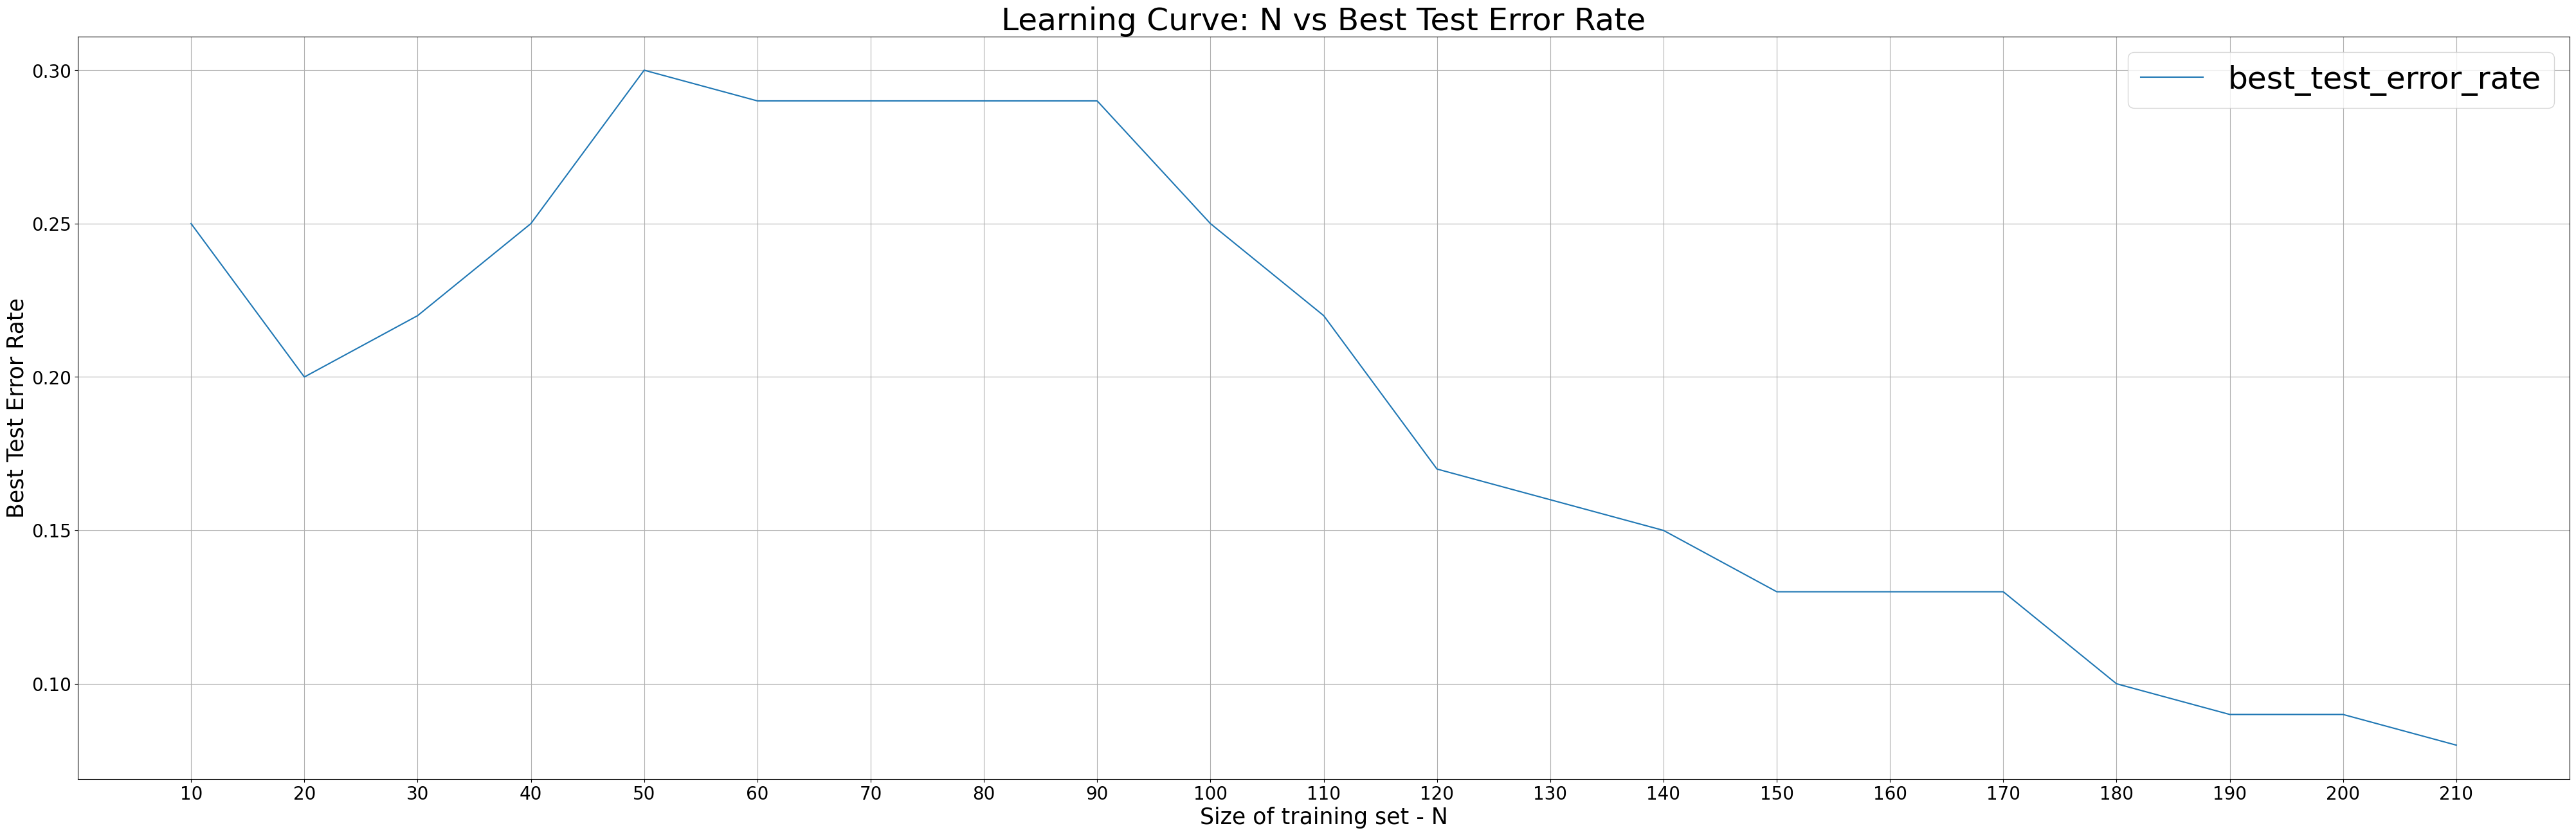

In [9]:

training_data_copy=training_set.copy()
class_0_train_data = training_data_copy.loc[training_data_copy['class'] == 0]
class_1_train_data = training_data_copy.loc[training_data_copy['class'] == 1]
optimal_k_value=[]
best_test_error_rate=[]

for n in range(10,211,10):
    
    ## N/3 -  required number of rows for class 0
    no_of_class_0_rows=math.floor(n/3);
    ## N-N/3 - required number of rows for class 1
    no_of_class_1_rows=n - no_of_class_0_rows;
    
    ##Choosing first n/3 rows of class 0 train data
    first_n_class_0_data=pd.DataFrame(class_0_train_data[:no_of_class_0_rows])
    
    ## Choosing first N-N/3 or 2N/3 rows of class 1 train data
    first_2n_by_3_class_1_data = pd.DataFrame(class_1_train_data[:no_of_class_1_rows])
    
    ## Making the new training set
    current_training_set = first_n_class_0_data.append(first_2n_by_3_class_1_data)
    
    current_train_x,current_train_y = current_training_set[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']], current_training_set['class']
    #Maximum possible is 1 since the error rate is average of 0's and 1's
    min_test_error_rate=1
    
    #Selecting optimal k, from 1 to n+1. 
    
    for k in range(1,n+1,5):
        knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn_classifier.fit(current_train_x,current_train_y)
        pred = knn_classifier.predict(test_x)
        test_error_rate = np.mean(pred!=test_y)
        min_test_error_rate=min(min_test_error_rate,test_error_rate);
    
    ##Adding to the list
    best_test_error_rate.append(min_test_error_rate)
    
print('Best test error rate Values: ', best_test_error_rate)
                                 

    
#####PLOTTING BEST TEST ERROR RATE #########
plt.figure(figsize=(50,15))
plt.xlabel('Size of training set - N',fontsize = 25)
plt.ylabel('Best Test Error Rate',fontsize = 25)
plt.plot(range(10,211,10), best_test_error_rate, label = "best_test_error_rate")
plt.xticks(np.arange(10, 211, 10), fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('Learning Curve: N vs Best Test Error Rate',fontsize = 35)
plt.legend(loc=1, prop={'size': 35})
plt.show()

        

#### *(d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.*

i. Minkowski Distance: <br>
A. which becomes Manhattan Distance with p = 1.<br>
B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k
∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?<br>
C. which becomes Chebyshev Distance with p → ∞ 
<br>
ii. Mahalanobis Distance

<span style="color:green"> The summarized table is printed after A,B,C are run and presented at the end after the cell w ith mahalanobis distance algo <br>
  A. Manhatten Distance - Minkowski Distance with p=1 
 </span>
 
 

Manhattan - Min test error rate:  0.11
Manhattan - Min Test error rate of 0.11 when k= [6, 11, 26]


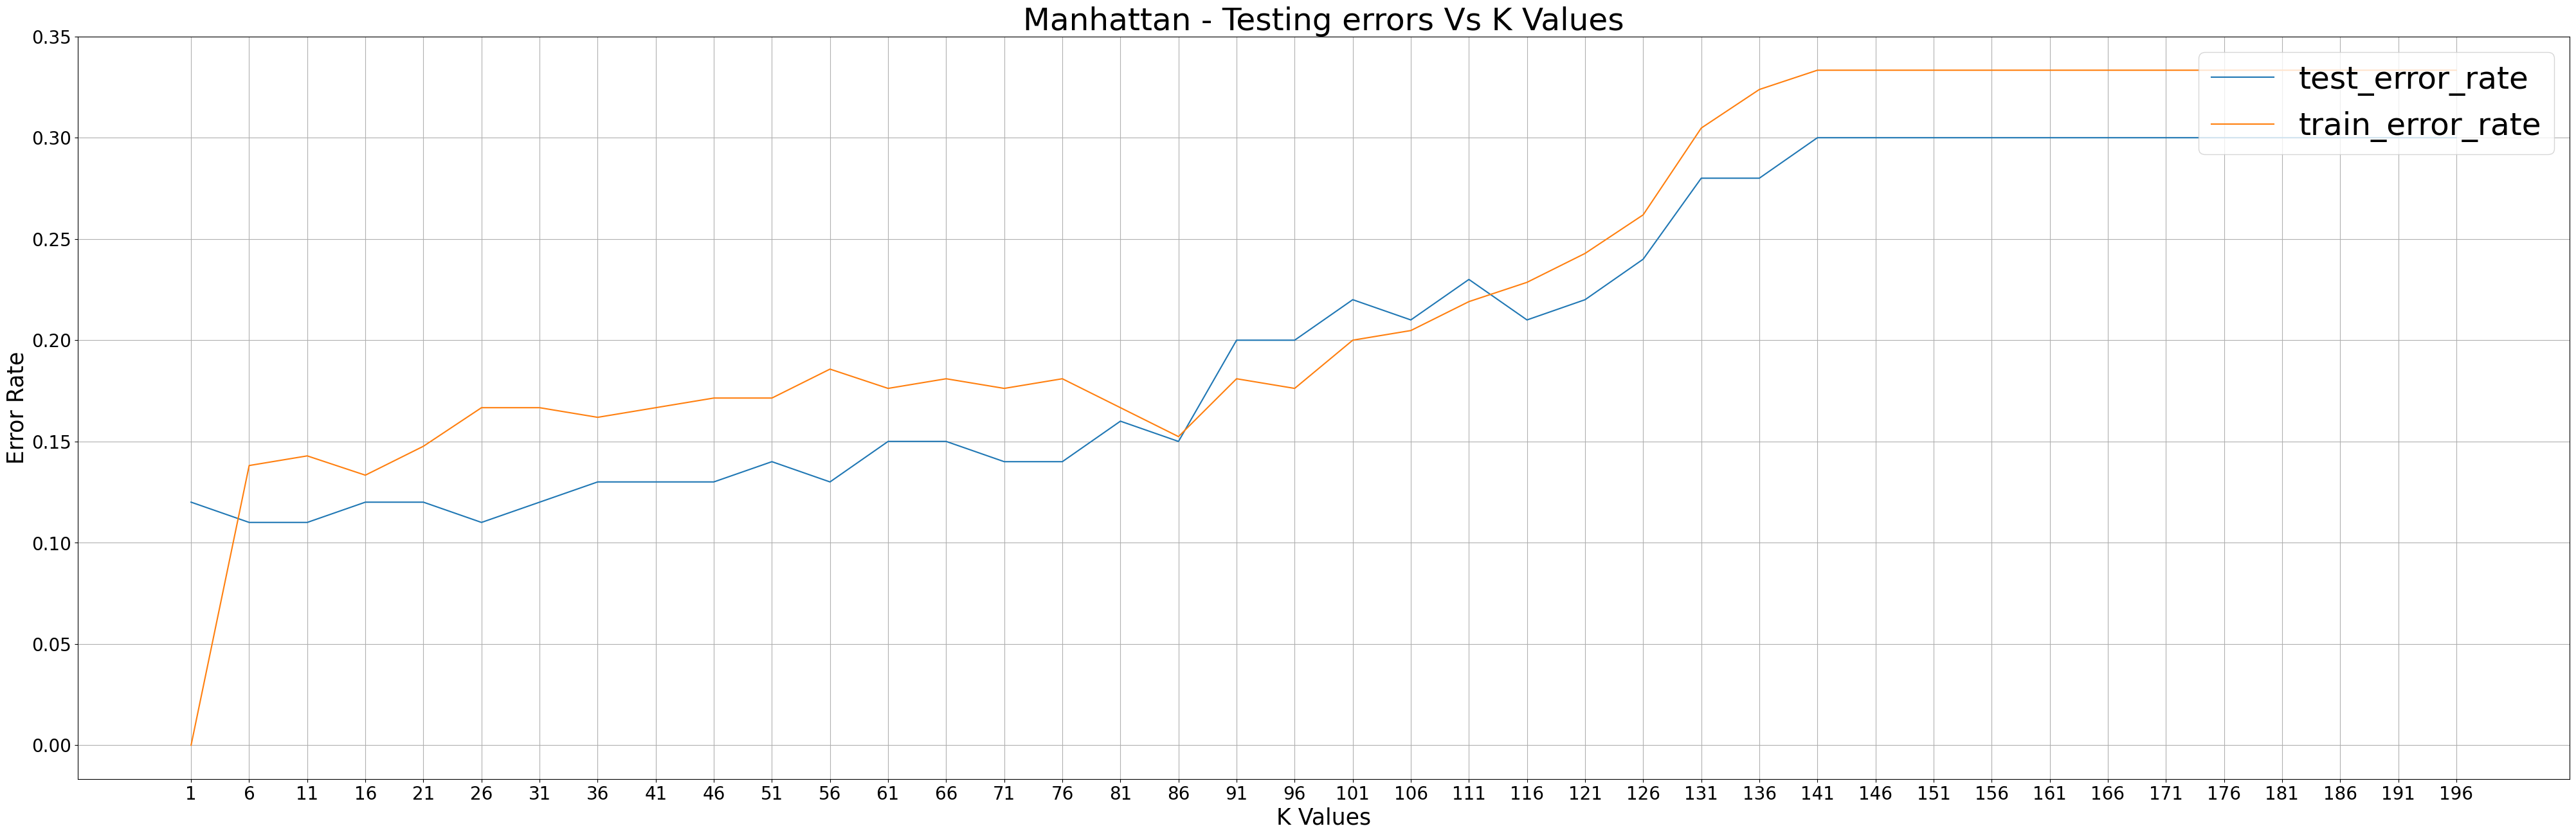

In [10]:
##Selecting best k - k with the minimum test error rate

##setting to the max value initially - error rate never goes beyond 1
min_test_err_rate_manhattan=1

###maintaing list for plotting graph for self understanding
test_error_rate_list=[]
tr_error_rate_list=[]

mhtn_optimal_k=[]
for k in range(1,197,5):
   # Create KNN Classifier - Commented one too works since default is minkowski, setting p to 1 makes it manhatten
   #knn = KNeighborsClassifier(n_neighbors=1,p=1)
    mhtn_knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    mhtn_knn.fit(train_x,train_y)
    mhtn_pred = mhtn_knn.predict(test_x)
    test_error_rate = np.mean(mhtn_pred!=test_y)
    test_error_rate_list.append(test_error_rate)
    
    ##capturing train error rate and accuracy score for self observation , not asked in question
    mhtn_pred_train_y= mhtn_knn.predict(train_x)
    mhtn_train_error_rate = np.mean(mhtn_pred_train_y!=train_y)
    tr_error_rate_list.append(mhtn_train_error_rate)
   
    if(test_error_rate<min_test_err_rate_manhattan):
        min_test_err_rate_manhattan=test_error_rate

##Printing the k values with the minimum test error
for i in range(len(test_error_rate_list)):
    if test_error_rate_list[i] == min_test_err_rate_manhattan:
        ##multiplying by 5, since k is in this pattern of 1,6,11,....
        mhtn_optimal_k.append(i*5+1)
        
print('Manhattan - Min test error rate: ',min_test_err_rate_manhattan)
print('Manhattan - Min Test error rate of', min_test_err_rate_manhattan,'when k=',mhtn_optimal_k)


#####PLOTTING  TEST ERROR RATE #########
plt.figure(figsize=(50,15))
plt.xlabel('K Values',fontsize = 25)
plt.ylabel('Error Rate',fontsize = 25)
plt.plot(range(1,198,5), test_error_rate_list, label = "test_error_rate")
plt.plot(range(1,198,5), tr_error_rate_list, label = "train_error_rate")
plt.xticks(np.arange(1,198,5), fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('Manhattan - Testing errors Vs K Values',fontsize = 35)
plt.legend(loc=1, prop={'size': 35})
plt.show()


From the above graph, the suitable k would be k=6, as train error is also the least at k=6.

<span style="color:green"> B.Minkowski Distance: with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k ∗ you found for the Manhattan distance in 1(d)iA
And Finding best log10(p)
    </span>
   <span style="color:blue"> <b> Choosing k=6 as the test error rate is minimum for k= [ 6, 11, 26]. From the graph, consider the training errors for k=6,11,26. Training error is lowest at k=6. Hence, k* is 6.<b>
</span>


In [11]:
import math 

p_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

##setting to the max value initially - error rate never goes beyond 1
min_err_rate_p_custom=1
best_p=0

for i in range(len(p_list)):
    #Taking antilog
    p_val=10.0**p_list[i]
    minkowski_knn_float_p = KNeighborsClassifier(n_neighbors=6,p=p_val)
    minkowski_knn_float_p.fit(train_x,train_y)
    minkowski_predict_p = minkowski_knn_float_p.predict(test_x)
    test_error_rate_p = np.mean(minkowski_predict_p!=test_y)
    if(test_error_rate_p<=min_err_rate_p_custom):
        min_err_rate_p_custom=test_error_rate_p
        best_p=p_val


print('The minimum test error found is',min_err_rate_p_custom,'So, Best p is ', best_p)
print('And Best log10(p) is' ,math.log10(best_p) )

The minimum test error found is 0.06 So, Best p is  3.9810717055349722
And Best log10(p) is 0.6


<span style="color:green">C. which becomes Chebyshev Distance with p → ∞ </span>

Manhattan - Min test error rate:  0.08
Manhattan - Min Test error rate is found when k= 16


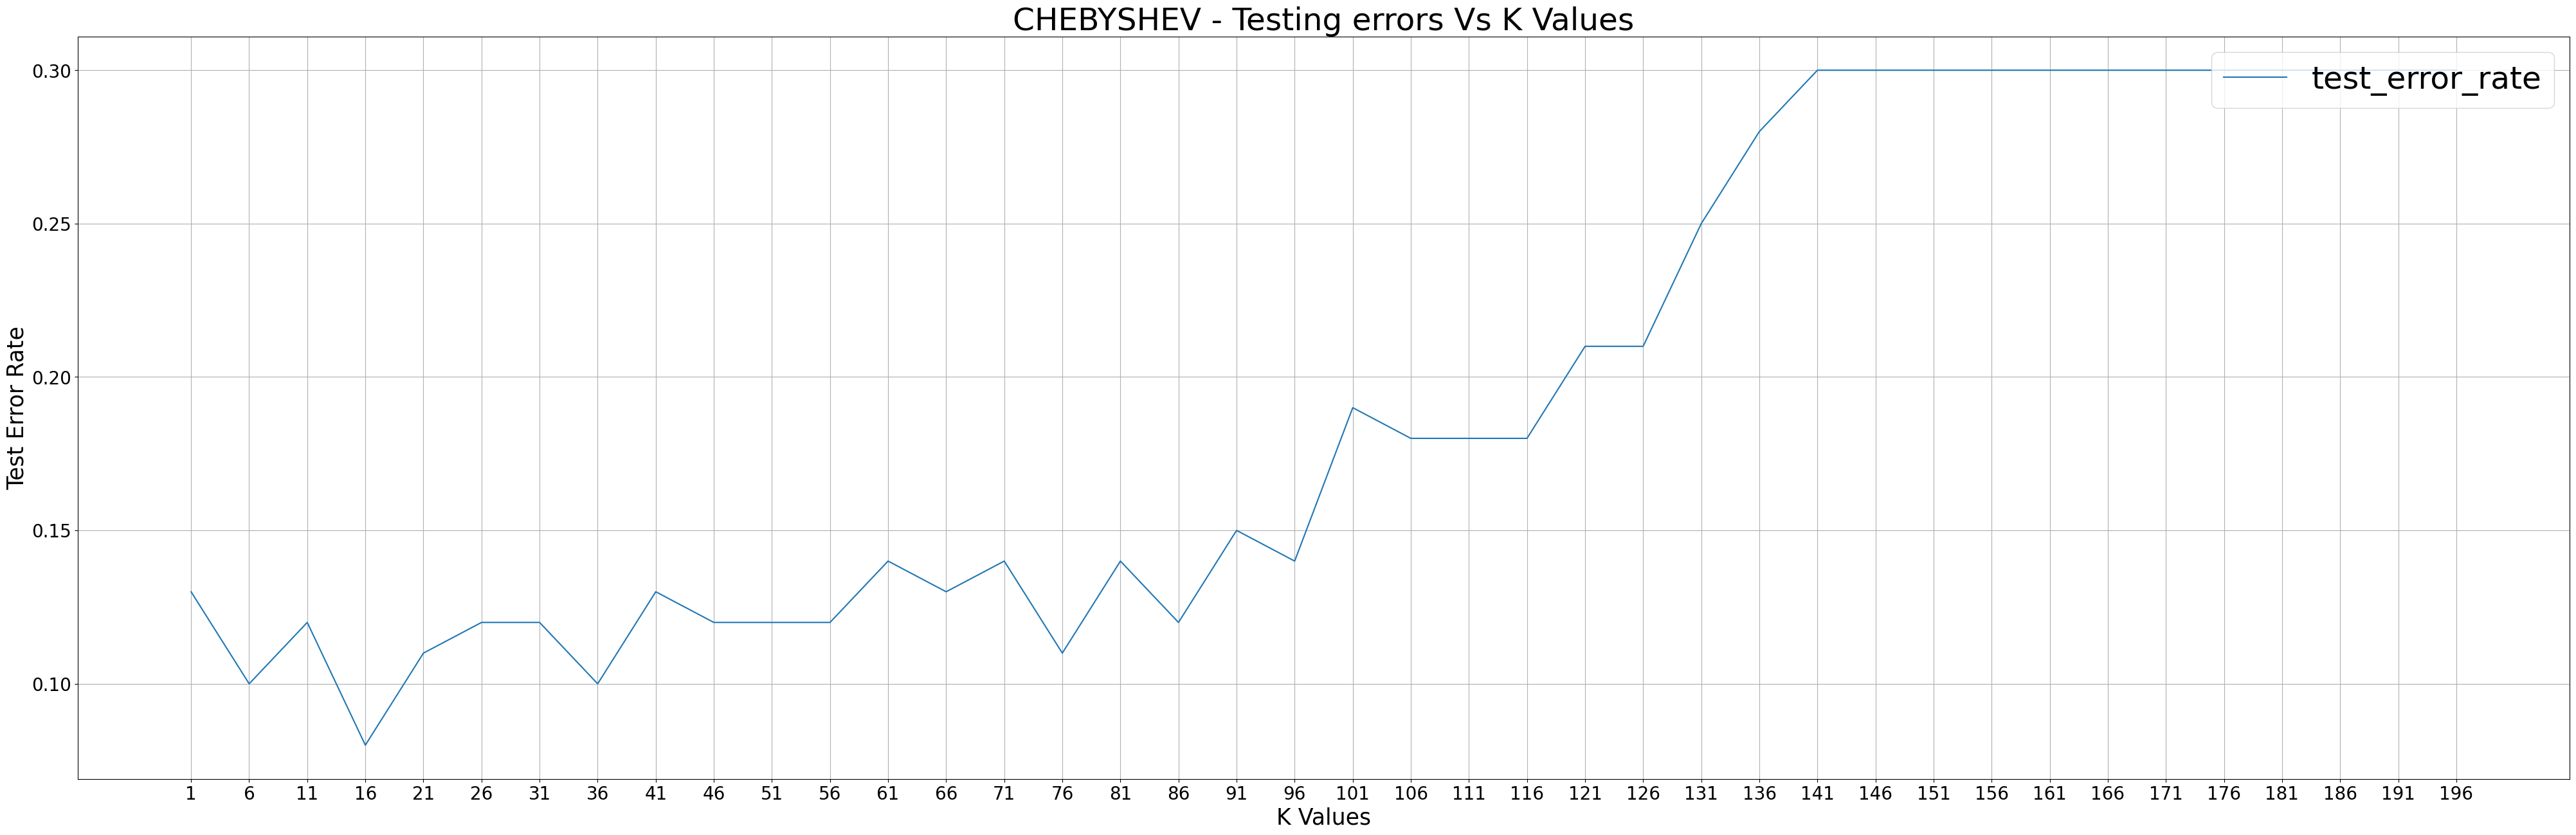

In [12]:
min_test_cheby_error_rate=1
cheby_optimal_k=0;
###maintaing list for plotting graph for self understanding
ch_test_error_rate_list=[]
for k in range(1,197,5):
   # Create KNN Classifier - Commented one too works
    #cheby_knn = KNeighborsClassifier(n_neighbors=k,p=math.inf)
    cheby_knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    cheby_knn.fit(train_x,train_y)
    cheby_pred = cheby_knn.predict(test_x)
    cheby_test_error_rate = np.mean(cheby_pred!=test_y)
    ch_test_error_rate_list.append(cheby_test_error_rate)
    if(cheby_test_error_rate<=min_test_cheby_error_rate):
        min_test_cheby_error_rate=cheby_test_error_rate
        cheby_optimal_k=k;

print('Manhattan - Min test error rate: ',min_test_cheby_error_rate)
print('Manhattan - Min Test error rate is found when k=',cheby_optimal_k)

        
#####PLOTTING BEST TEST ERROR RATE #########
plt.figure(figsize=(50,15))
plt.xlabel('K Values',fontsize = 25)
plt.ylabel('Test Error Rate',fontsize = 25)
plt.plot(range(1,198,5), ch_test_error_rate_list, label = "test_error_rate")
plt.xticks(np.arange(1,198,5), fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('CHEBYSHEV - Testing errors Vs K Values',fontsize = 35)
plt.legend(loc=1, prop={'size': 35})
plt.show()

<span style="color:green">ii. Mahanalobis Distance</span>

MAHANALOBIS: Minimum test error rate: 0.17
MAHANALOBIS: Optimal K: 6


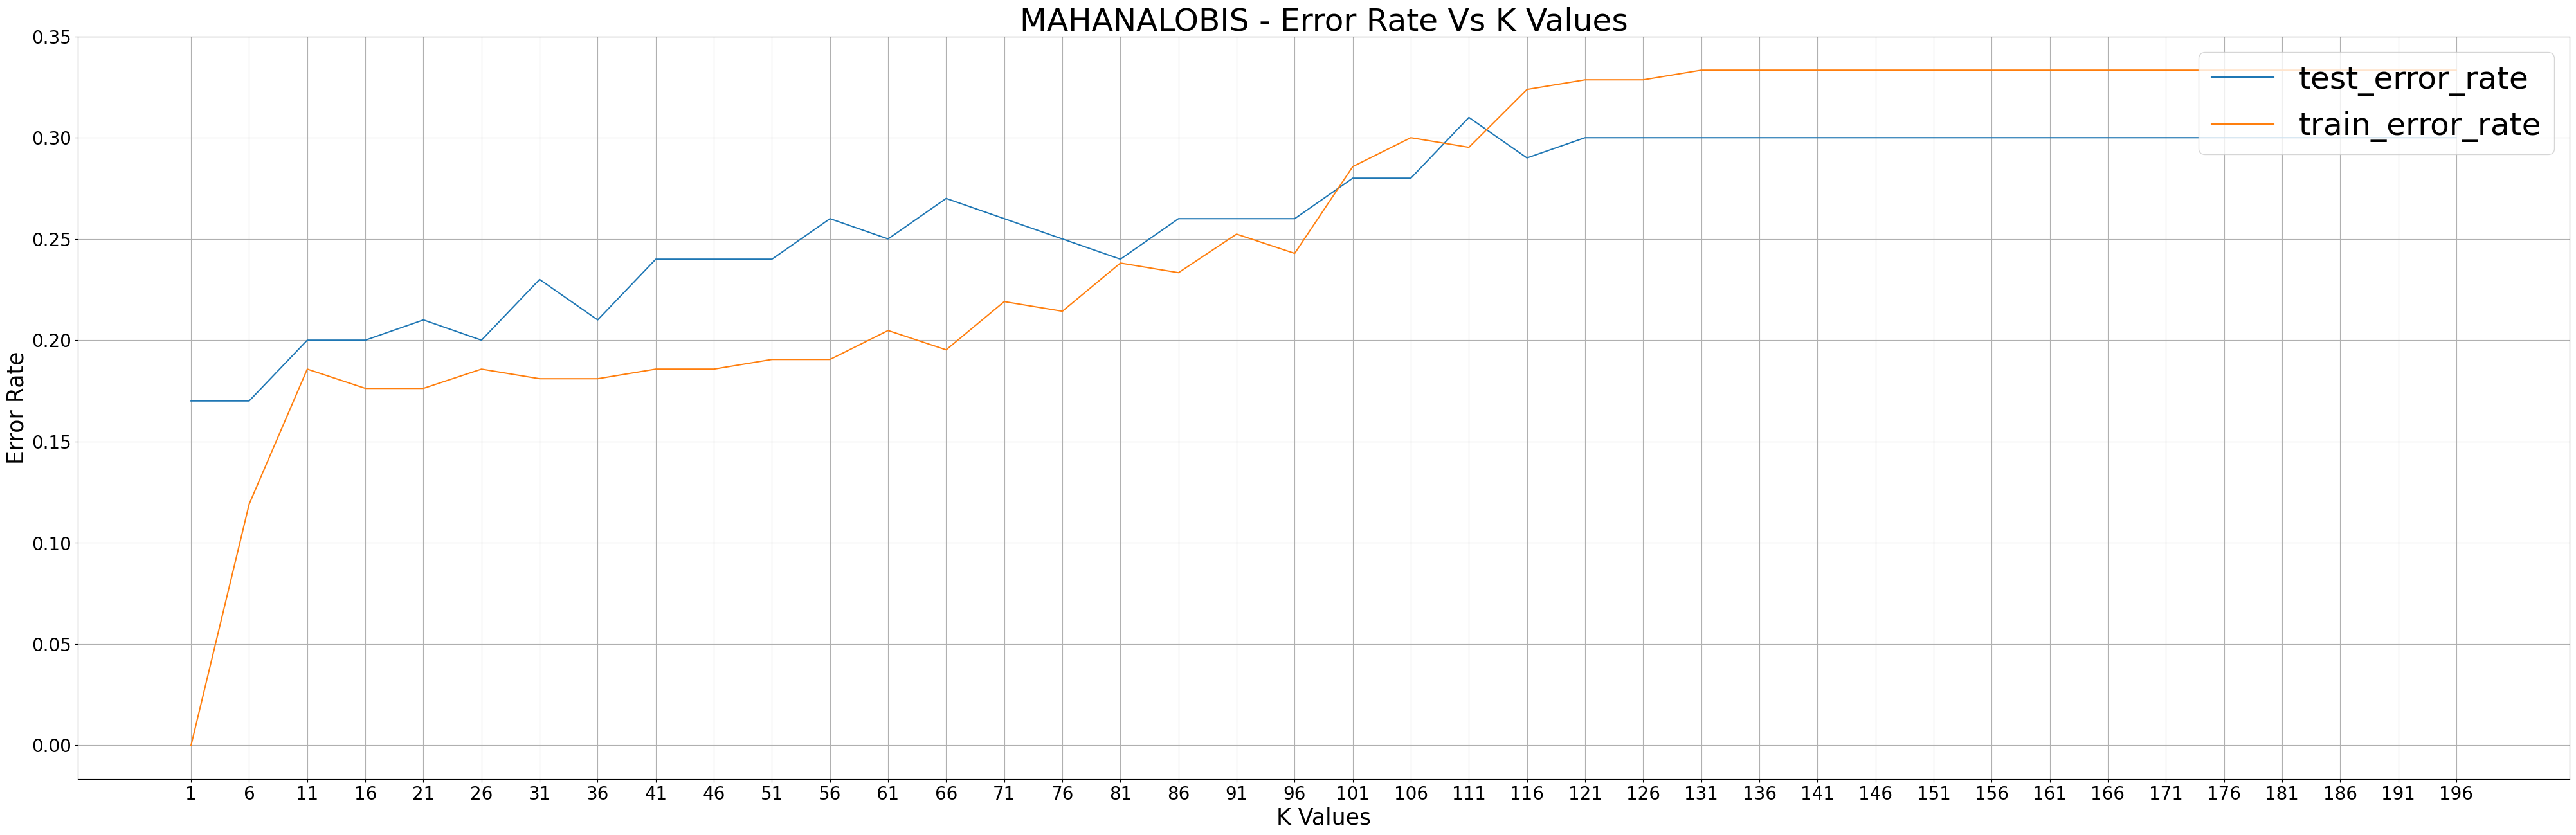

In [13]:
min_maha_test_error_rate=1
maha_optimal_k=0;

maha_te_list=[]
maha_tr_list=[]

for k in range(1,197,5):
    #Covariance of training data (independent features)
    X=np.cov(train_x,rowvar=False)
    #maha_knn = KNeighborsClassifier(n_neighbors=k,metric='mahalanobis', metric_params={'VI': np.linalg.inv(X)})
    #Taking pseudo inverse 
    maha_knn = KNeighborsClassifier(n_neighbors=k,metric='mahalanobis', metric_params={'VI': np.linalg.pinv(X)})
    maha_knn.fit(train_x,train_y)
    maha_pred= maha_knn.predict(test_x)
    maha_test_error_rate = np.mean(maha_pred!=test_y)
    
    ###Not asked in Question  - Just for Self observation
    maha_pred_tr= maha_knn.predict(train_x)
    maha_train_error_rate = np.mean(maha_pred_tr!=train_y)
    
    maha_te_list.append(maha_test_error_rate)
    maha_tr_list.append(maha_train_error_rate)
    
    if(maha_test_error_rate<=min_maha_test_error_rate):
        min_maha_test_error_rate=maha_test_error_rate
        maha_optimal_k=k;

print('MAHANALOBIS: Minimum test error rate:',min_maha_test_error_rate)
print('MAHANALOBIS: Optimal K:',maha_optimal_k)

#####PLOTTING BEST TEST ERROR RATE #########
plt.figure(figsize=(50,15))
plt.xlabel('K Values',fontsize = 25)
plt.ylabel('Error Rate',fontsize = 25)
plt.plot(range(1,198,5), maha_te_list, label = "test_error_rate")
plt.plot(range(1,198,5), maha_tr_list, label = "train_error_rate")
plt.xticks(np.arange(1,198,5), fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title('MAHANALOBIS - Error Rate Vs K Values',fontsize = 35)
plt.legend(loc=1, prop={'size': 35})
plt.show()

In [14]:

table_info = {'Manhattan': min_test_err_rate_manhattan,
'Manhattan with best log p': min_err_rate_p_custom,
'Chebyshev':min_test_cheby_error_rate,
'Mahalanobis':min_maha_test_error_rate}
headers=["TEST ERRORS"] 
print('********************SUMMARIZED TABLE*********************\n')
print(pd.DataFrame(table_info, headers))

print('\n\nBest log10(p) is',math.log10(best_p) )

********************SUMMARIZED TABLE*********************

             Manhattan  Manhattan with best log p  Chebyshev  Mahalanobis
TEST ERRORS       0.11                       0.06       0.08         0.17


Best log10(p) is 0.6


(e) The majority polling decision can be replaced by weighted decision, in which the
weight of each point in voting is inversely proportional to its distance from the
query/test data point. In this case, closer neighbors of a query point will have
a greater influence than neighbors which are further away. Use weighted voting
with Euclidean, Manhattan, and Chebyshev distances and report the best test
errors when k ∈ {1, 6, 11, 16, . . . , 196}

Best test error for Euclidean Distance: 0.1
Best test error for Chebyshev Distance 0.11
Best test error for Mahattan Distance 0.1
Minimum test rate for Euclidean Distance at possible optimal values of k= [6]
Minimum test rate for Chebyshev Distance at possible optimal values of k= [16, 31, 36, 41, 61]
Minimum test rate for Manhattan Distance at possible optimal values of k= [26]


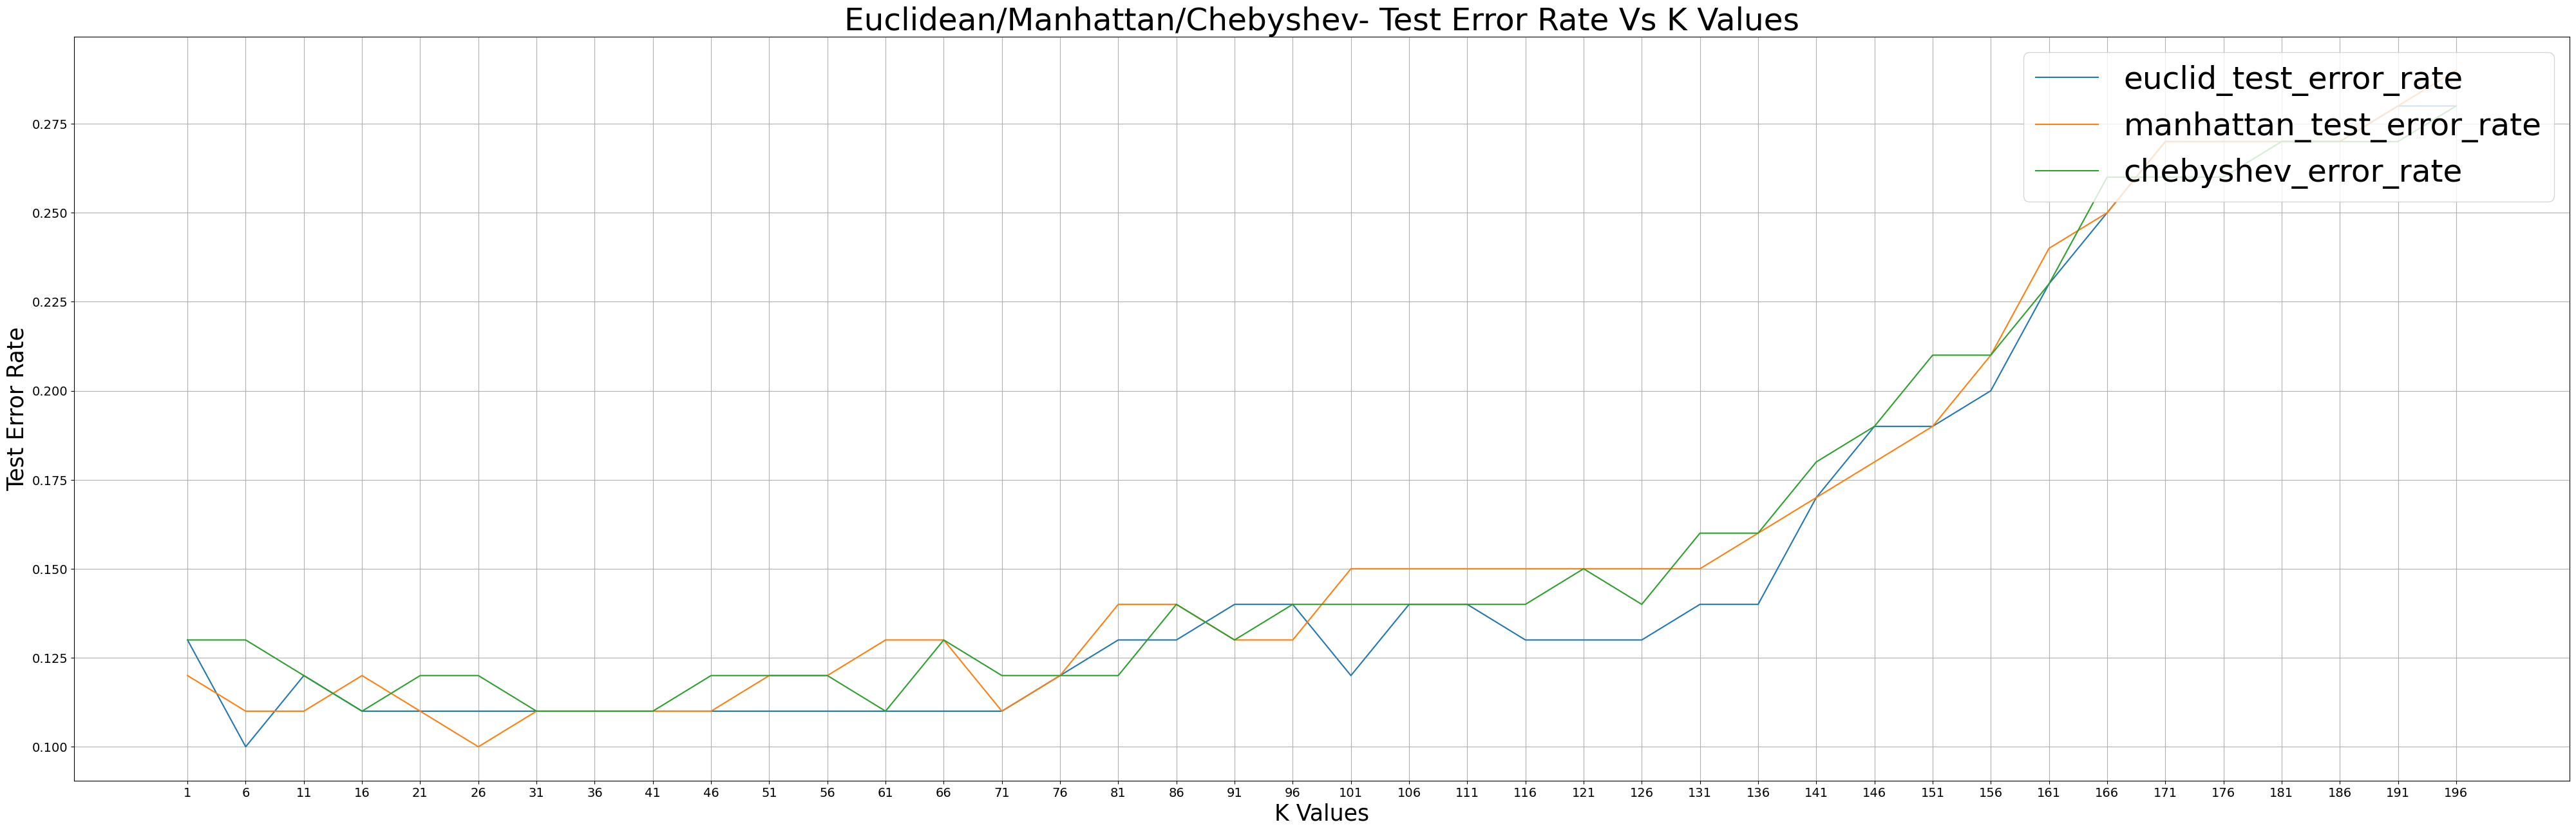

In [15]:
#Setting minimum test error rate as 1 initially as 1 is maximum error rate possible
min_cheby=1
min_euclid=1
min_manhattan=1


cheby_optimal_k=[];
euclid_optimal_k=[];
manhat_optimal_k=[];

#for plotting in graph for self understanding
euclid_te_list=[]
manhat_te_list=[]
cheby_te_list=[]

for k in range(1,197,5):
   # Create KNN Classifier - Commented one too works
   #knn = KNeighborsClassifier(n_neighbors=1,p=1)
#     euclid_knn = KNeighborsClassifier(n_neighbors=k,p=2,weights="distance")
#     cheby_knn = KNeighborsClassifier(n_neighbors=k,p=math.inf,weights="distance")
#     manhat_knn = KNeighborsClassifier(n_neighbors=k,p=1,weights="distance")
    
    euclid_knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean',weights="distance")
    cheby_knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev',weights="distance")
    manhat_knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan',weights="distance")
    
    euclid_knn.fit(train_x,train_y)
    cheby_knn.fit(train_x,train_y)
    manhat_knn.fit(train_x,train_y)
    
    ##predicting test Y data
    euclid_pred = euclid_knn.predict(test_x)
    cheby_pred=cheby_knn.predict(test_x)
    manhat_pred=manhat_knn.predict(test_x)
    
    euclid_test_error_rate = np.mean(euclid_pred!=test_y)
    cheby_test_error_rate = np.mean(cheby_pred!=test_y) 
    manhat_test_error_rate = np.mean(manhat_pred!=test_y)
    
    euclid_te_list.append(euclid_test_error_rate)
    manhat_te_list.append(manhat_test_error_rate)
    cheby_te_list.append(cheby_test_error_rate)
    
    if(euclid_test_error_rate<=min_euclid):
        min_euclid=euclid_test_error_rate
    if(cheby_test_error_rate<=min_cheby):
        min_cheby=cheby_test_error_rate
    if(manhat_test_error_rate<=min_manhattan):
        min_manhattan=manhat_test_error_rate
        
##Printing the k values with the minimum test error - euclid
for i in range(len(euclid_te_list)):
    if euclid_te_list[i] ==  min_euclid:
        ##multiplying by 5, since k is in this pattern of 1,6,11,....
        euclid_optimal_k.append(i*5+1)
##Printing the k values with the minimum test error- manhattan
for i in range(len(manhat_te_list)):
    if manhat_te_list[i] ==  min_manhattan:
        ##multiplying by 5, since k is in this pattern of 1,6,11,....
        manhat_optimal_k.append(i*5+1)
##Printing the k values with the minimum test error - cheby
for i in range(len(cheby_te_list)):
    if cheby_te_list[i] ==  min_cheby:
        ##multiplying by 5, since k is in this pattern of 1,6,11,....
        cheby_optimal_k.append(i*5+1)
    
print('Best test error for Euclidean Distance:',min_euclid)
print('Best test error for Chebyshev Distance',min_cheby)
print('Best test error for Mahattan Distance',min_manhattan)

print('Minimum test rate for Euclidean Distance at possible optimal values of k=',euclid_optimal_k)
print('Minimum test rate for Chebyshev Distance at possible optimal values of k=',cheby_optimal_k)
print('Minimum test rate for Manhattan Distance at possible optimal values of k=',manhat_optimal_k)


#####PLOTTING TEST ERROR RATE #########
plt.figure(figsize=(50,15))
plt.xlabel('K Values',fontsize = 25)
plt.ylabel('Test Error Rate',fontsize = 25)
plt.plot(range(1,197,5), euclid_te_list, label = "euclid_test_error_rate")
plt.plot(range(1,197,5), manhat_te_list, label = "manhattan_test_error_rate")
plt.plot(range(1,197,5), cheby_te_list, label = "chebyshev_error_rate")
plt.xticks(np.arange(1,197,5), fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('Euclidean/Manhattan/Chebyshev- Test Error Rate Vs K Values',fontsize = 35)
plt.legend(loc=1, prop={'size': 35})
plt.show()

<b> Observations</b><br>
Hence, from the graph above, the optimal value of k for which test error is minimum is :
<br> 
Euclidean distance : k=6 <br>
Chebyshev distance: k=61<br> ( choosing largest k)
Manhattan distance: k=26

(f) What is the lowest training error rate you achieved in this homework?

<b>Lowest training error achieved is 0.
Based on the observations and reading,at k=1, the sample always chooses itself as the closest, and there wont be any training error, resulting to 0. This is the lowest achieved. <b>

References

https://www.delftstack.com/howto/matplotlib/how-to-revert-axes-in-matplotlib/
https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79
    
    